### Periodic Time Series
Plot two periodic time series with scaled magnitude. Compare the covariance.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from ssgp import SSGP

### SSGP Approximation

In [29]:
# Generate synthetic time series data
np.random.seed(42)
T_1 = 20
T_2 = 40
X = np.linspace(0, 100, 100).reshape(-1, 1)  # Time indices (input X)
Y = (np.sin(2*np.pi*X/T_1) + np.sin(2*np.pi*X/T_2)).ravel() + np.random.normal(0, 0.5, 100)  # Time series values (target y)
Y_true = (np.sin(2*np.pi*X/T_1) + np.sin(2*np.pi*X/T_2)).ravel()

X_test = np.linspace(0, 100, 100).reshape(-1, 1)  # Test time indices


### Exponential Sine Squared Kernel

In [25]:
# Initialize and fit the SSGP model
ssgp = SSGP(n_features=100, length_scale=1.0, period=10.0, sigma_f=1.0, sigma_n=0.1, kernel="ExpSinSquared")
ssgp.fit(X, Y)
y_pred, std_f = ssgp.predict(X_test)

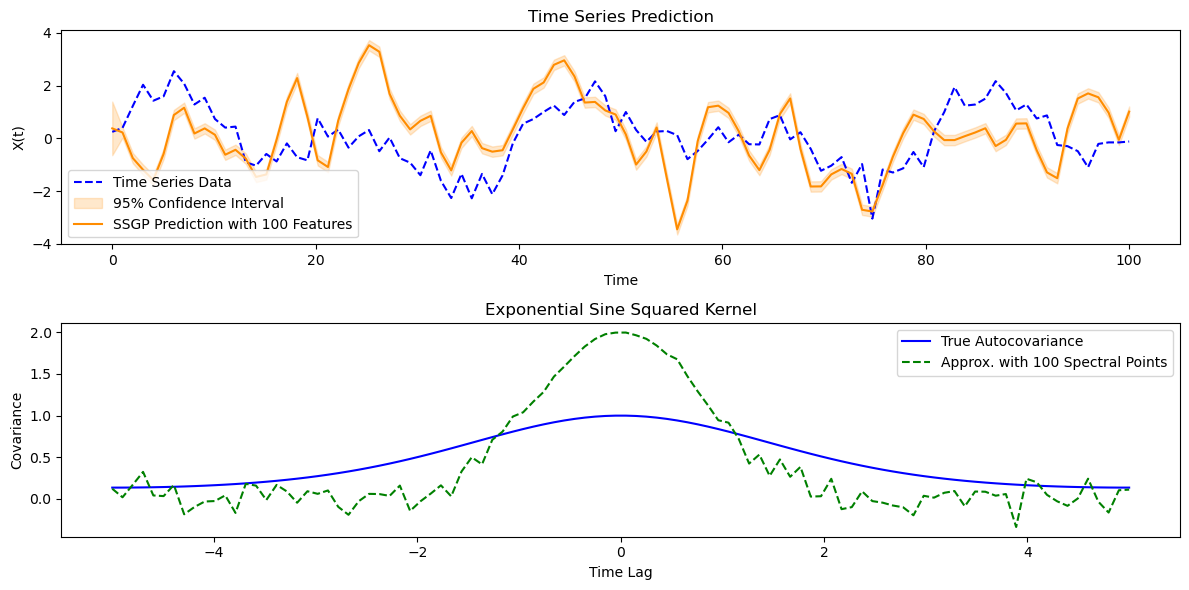

In [26]:
plt.figure(figsize=(12, 6))
# Plot the time series and predictions
plt.subplot(2, 1, 1)
plt.plot(X, Y, label="Time Series Data", color="blue",linestyle="--")
plt.fill_between(X_test.flatten(), 
                 y_pred.flatten() - 1.96 * std_f, 
                 y_pred.flatten() + 1.96 * std_f, 
                 color='darkorange', alpha=0.2, label='95% Confidence Interval')
plt.plot(X_test, y_pred, label="SSGP Prediction with 100 Features", color="darkorange")
# plt.plot(X_test, Y_true, label="True Function", color="pink")

plt.xlabel("Time")
plt.ylabel("X(t)")
plt.title("Time Series Prediction")
plt.legend()

# Plot the true and approximate autocovariance functions
plt.subplot(2, 1, 2)
x_values = np.linspace(-5, 5, 100)
true_cov = [ssgp.true_kernel(np.array([0]), np.array([x])) for x in x_values]
approx_cov = [ssgp.approximate_kernel(np.array([0]), np.array([x])) for x in x_values]

plt.plot(x_values, true_cov, label="True Autocovariance", color="blue")
plt.plot(x_values, approx_cov, label="Approx. with 100 Spectral Points", color="green", linestyle="--")
plt.xlabel("Time Lag")
plt.ylabel("Covariance")
plt.title("Exponential Sine Squared Kernel")
plt.legend()

plt.tight_layout()
plt.show()

Mean Squared Error (MSE): 2.2126


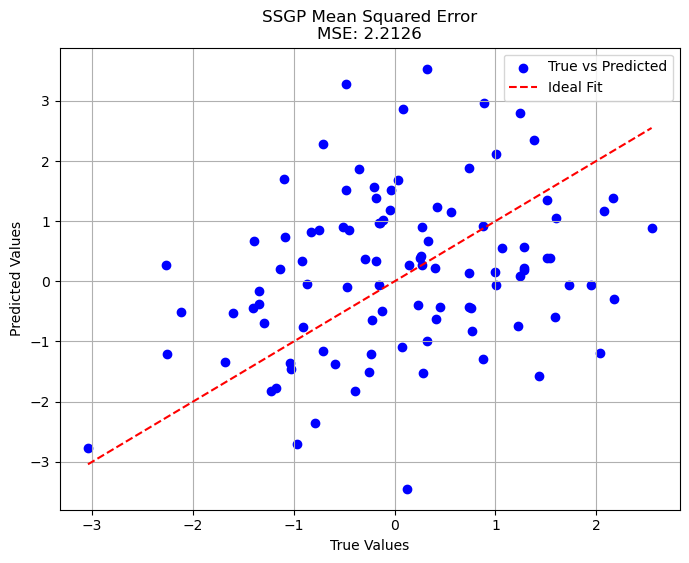

2.212609983084749

In [27]:
plot_mean_squared_error(Y, y_pred, title="SSGP Mean Squared Error")

### RBF Kernel 

In [30]:
# Initialize and fit the SSGP model
ssgp = SSGP(n_features=100, length_scale=1.0, period=10.0, sigma_f=1.0, sigma_n=0.1, kernel="RBF")
ssgp.fit(X, Y)
y_pred, std_f = ssgp.predict(X_test)

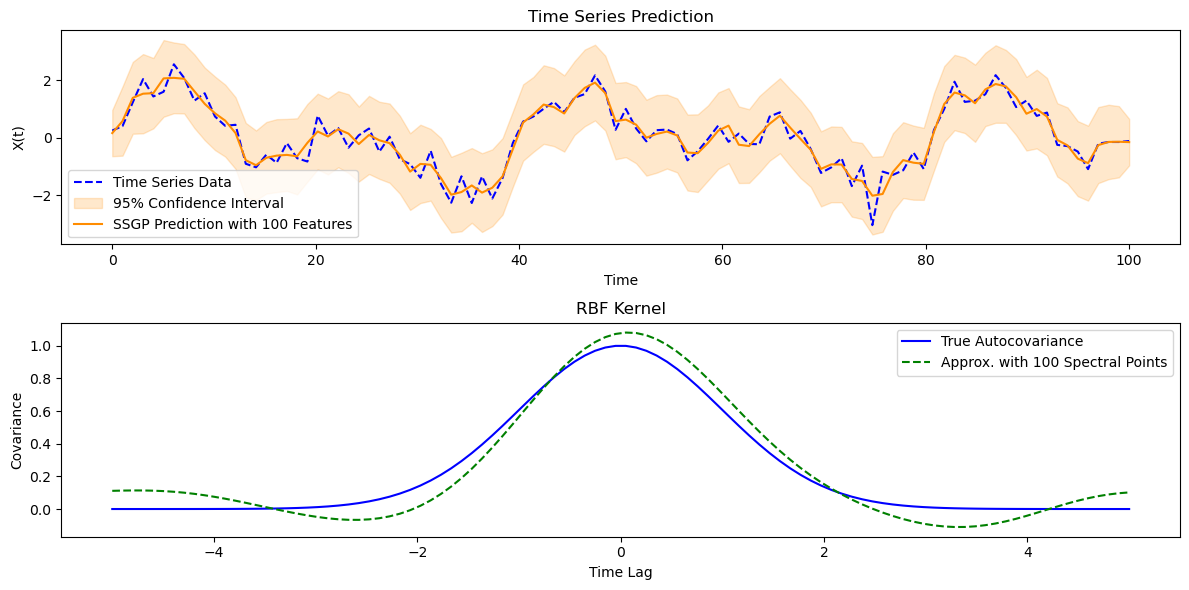

In [31]:
plt.figure(figsize=(12, 6))
# Plot the time series and predictions
plt.subplot(2, 1, 1)
plt.plot(X, Y, label="Time Series Data", color="blue",linestyle="--")
plt.fill_between(X_test.flatten(), 
                 y_pred.flatten() - 1.96 * std_f, 
                 y_pred.flatten() + 1.96 * std_f, 
                 color='darkorange', alpha=0.2, label='95% Confidence Interval')
plt.plot(X_test, y_pred, label="SSGP Prediction with 100 Features", color="darkorange")
# plt.plot(X_test, Y_true, label="True Function", color="pink")

plt.xlabel("Time")
plt.ylabel("X(t)")
plt.title("Time Series Prediction")
plt.legend()

# Plot the true and approximate autocovariance functions
plt.subplot(2, 1, 2)
x_values = np.linspace(-5, 5, 100)
true_cov = [ssgp.true_kernel(np.array([0]), np.array([x])) for x in x_values]
approx_cov = [ssgp.approximate_kernel(np.array([0]), np.array([x])) for x in x_values]

plt.plot(x_values, true_cov, label="True Autocovariance", color="blue")
plt.plot(x_values, approx_cov, label="Approx. with 100 Spectral Points", color="green", linestyle="--")
plt.xlabel("Time Lag")
plt.ylabel("Covariance")
plt.title("RBF Kernel")
plt.legend()

plt.tight_layout()
plt.show()

Mean Squared Error (MSE): 0.0936


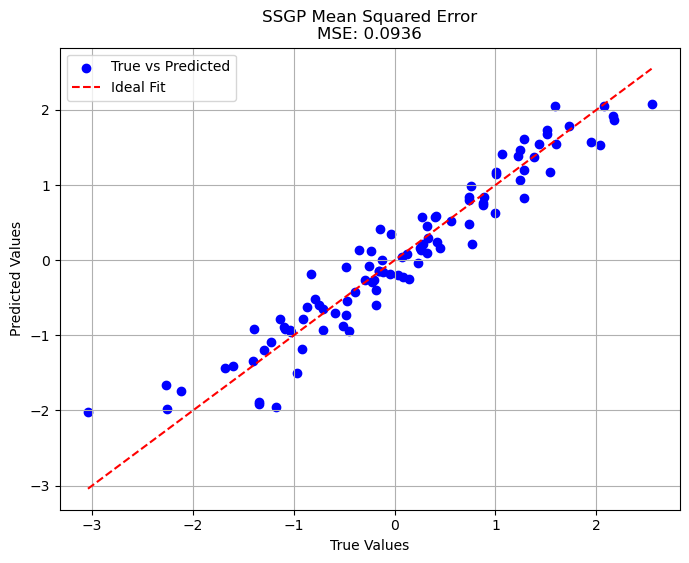

0.09355484294408961

In [32]:
plot_mean_squared_error(Y, y_pred, title="SSGP Mean Squared Error")

### Exponential Sine Kernel 

In [33]:
# Initialize and fit the SSGP model
ssgp = SSGP(n_features=100, length_scale=1.0, period=10.0, sigma_f=1.0, sigma_n=0.1, kernel="ExpSin")
ssgp.fit(X, Y)
y_pred, std_f = ssgp.predict(X_test)

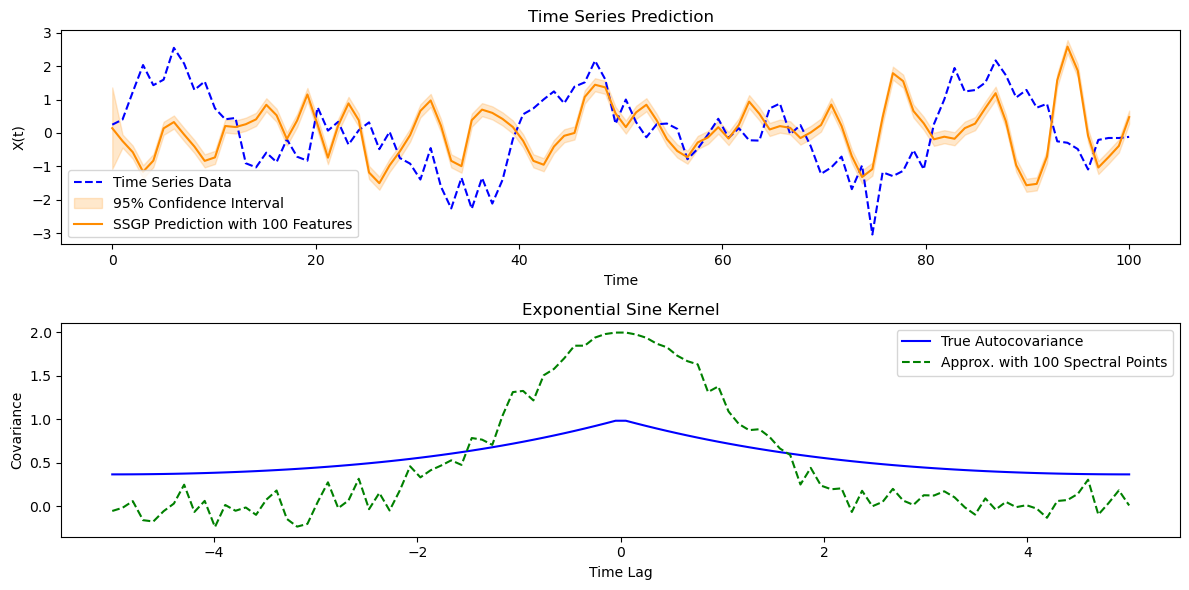

In [34]:
plt.figure(figsize=(12, 6))
# Plot the time series and predictions
plt.subplot(2, 1, 1)
plt.plot(X, Y, label="Time Series Data", color="blue",linestyle="--")
plt.fill_between(X_test.flatten(), 
                 y_pred.flatten() - 1.96 * std_f, 
                 y_pred.flatten() + 1.96 * std_f, 
                 color='darkorange', alpha=0.2, label='95% Confidence Interval')
plt.plot(X_test, y_pred, label="SSGP Prediction with 100 Features", color="darkorange")
# plt.plot(X_test, Y_true, label="True Function", color="pink")

plt.xlabel("Time")
plt.ylabel("X(t)")
plt.title("Time Series Prediction")
plt.legend()

# Plot the true and approximate autocovariance functions
plt.subplot(2, 1, 2)
x_values = np.linspace(-5, 5, 100)
true_cov = [ssgp.true_kernel(np.array([0]), np.array([x])) for x in x_values]
approx_cov = [ssgp.approximate_kernel(np.array([0]), np.array([x])) for x in x_values]

plt.plot(x_values, true_cov, label="True Autocovariance", color="blue")
plt.plot(x_values, approx_cov, label="Approx. with 100 Spectral Points", color="green", linestyle="--")
plt.xlabel("Time Lag")
plt.ylabel("Covariance")
plt.title("Exponential Sine Kernel")
plt.legend()

plt.tight_layout()
plt.show()

Mean Squared Error (MSE): 1.9978


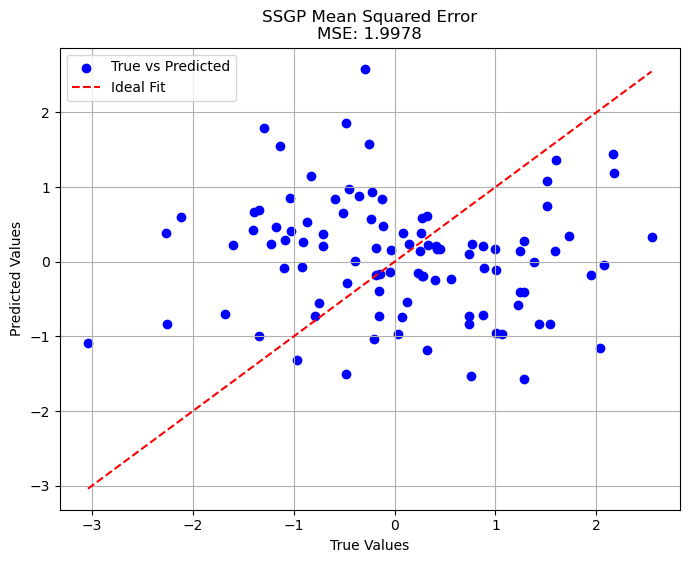

1.9978414532345588

In [35]:
plot_mean_squared_error(Y, y_pred, title="SSGP Mean Squared Error")

### Do the fitting with Gaussian Process Regressor

In [9]:
import numpy as np
import gpflow
from gpflow.kernels import Periodic
import matplotlib.pyplot as plt
import random
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, WhiteKernel, ConstantKernel
from sklearn.metrics import mean_squared_error

np.random.seed(42)
T_1 = 20
T_2 = 40
X = np.linspace(0, 100, 100).reshape(-1, 1)  # Time indices (input X)
Y = (np.sin(2*np.pi*X/T_1) + np.sin(2*np.pi*X/T_2)).ravel() + np.random.normal(0, 0.5, 100)  # Time series values (target y)

X_test = np.linspace(0, 100, 100).reshape(-1, 1)  # Test time indices

# Define kernel for Gaussian Process
base_kernel = ExpSineSquared(length_scale=1, periodicity=1)
# RBF(length_scale=1.0)
# ConstantKernel(1.0) 

# Step 1: Train Gaussian Process on the base function (sine)
base_gp = GaussianProcessRegressor(kernel=base_kernel, alpha=1e-5, n_restarts_optimizer=20)
base_gp.fit(X, Y)
y_pred_base, sigma_base = base_gp.predict(X_test, return_std=True)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


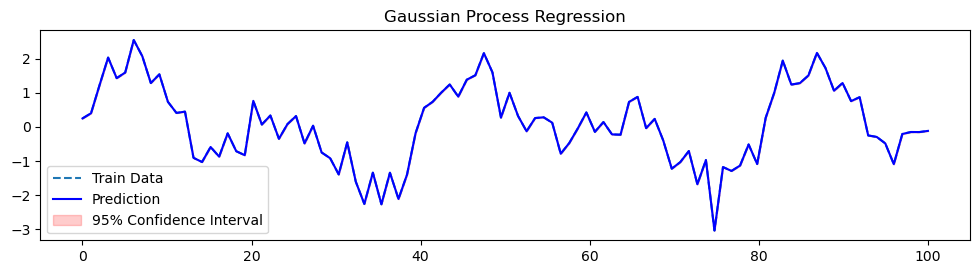

In [10]:
# Base GP
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(X, Y, label='Train Data', linestyle="--")
plt.plot(X_test, y_pred_base, 'b-', label='Prediction')
plt.fill_between(X_test.flatten(), 
                 y_pred_base.flatten() - 1.96 * sigma_base, 
                 y_pred_base.flatten() + 1.96 * sigma_base, 
                 color='red', alpha=0.2, label='95% Confidence Interval')
plt.title("Gaussian Process Regression")
plt.legend()